In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Activation, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.metrics import F1Score

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## Chargement des données

In [48]:
mnist = mnist.load_data()

In [49]:
# Chargement des données MNIST : Les données sont déjà divisées en ensembles d'entraînement et de test et sont prêtes à être utilisées. 
# Les images sont de taille 28x28 pixels et les étiquettes sont des chiffres de 0 à 9.

(X_train, y_train), (X_test, y_test) = mnist 

In [50]:
# Taille des données
print("Taille des données d'entraînement :", X_train.shape, y_train.shape) 
print("Taille des données de test :", X_test.shape, y_test.shape)

Taille des données d'entraînement : (60000, 28, 28) (60000,)
Taille des données de test : (10000, 28, 28) (10000,)


In [54]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

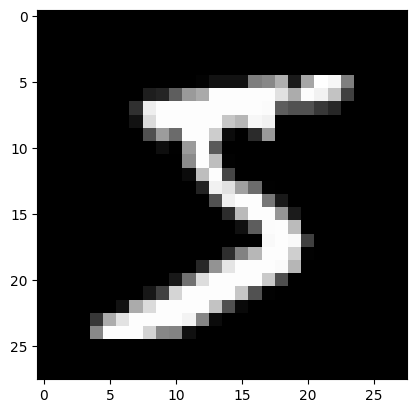

In [55]:
# voir image x_train[0] avec matplotlib
plt.imshow(X_train[0], cmap='gray')

### Normalisation des données

In [56]:
# Normalisation des données entre 0 et 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [61]:
X_train[0][15:20, 15:20]


array([[0.7294118 , 0.99215686, 0.99215686, 0.5882353 , 0.10588235],
       [0.0627451 , 0.3647059 , 0.9882353 , 0.99215686, 0.73333335],
       [0.        , 0.        , 0.9764706 , 0.99215686, 0.9764706 ],
       [0.50980395, 0.7176471 , 0.99215686, 0.99215686, 0.8117647 ],
       [0.99215686, 0.99215686, 0.99215686, 0.98039216, 0.7137255 ]],
      dtype=float32)

In [63]:
# Redimensionnement des données pour les adapter à l'entrée du modèle
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [65]:
# Conversion des étiquettes en format catégoriel
y_train = to_categorical(y_train, num_classes=10) # que 
y_test = to_categorical(y_test, num_classes=10)

Label de l'image : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


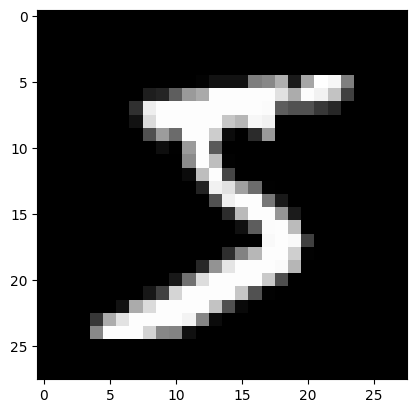

In [ ]:
# Tracer la 1ere image de l'ensemble d'entraînement
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
print("Label de l'image :", y_train[0])  # Affiche le label de l'image

In [66]:
# sample = 20
# images = X_train[:sample]
# fig = plt.figure(figsize=(10, 10))
# for i in range(sample):
#     ax = fig.add_subplot(5, 4, i + 1)
#     ax.imshow(images[i], cmap='gray')
#     ax.set_title(f"Label: {y_train[i]}")
#     ax.axis('off')
# plt.tight_layout()
# plt.show()


In [74]:
# création du modèle
model = Sequential()
# Ajout de la première couche d'entrée en input avec une forme de 28x28x1 (image en niveaux de gris)
model.add(Input(shape=(28, 28, 1)))
model.add(Flatten())  # Aplatit les données d'entrée pour les rendre compatibles avec les couches denses
model.add(Dense(128, activation='relu'))  # Couche dense avec 128 neurones et activation ReLU
model.add(Dense(10, activation='softmax'))  # Couche de sortie avec 10 neurones (une pour chaque classe) et activation softmax

In [76]:
model = Sequential(
    [
        Input(shape=(28, 28, 1)),  # Couche d'entrée
        Flatten(),  # Aplatit les données
        Dense(128, activation='relu'),  # Couche dense avec 128 neurones et activation ReLU
        Dense(10, activation='softmax')  # Couche de sortie avec 10 neurones et activation softmax
    ]
)

In [77]:
model.summary()  # Affiche le résumé du modèle

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss='categorical_crossentropy',  # Fonction de perte pour la classification multi-classe
    optimizer='adam',  # Optimiseur Adam
    metrics=['accuracy']  # Métriques pour évaluer le modèle (précision)
)

### Ajustement du modele

In [81]:
# Ajustement du modèle
mymodel = model.fit(
    X_train, y_train,  # Données d'entraînement et étiquettes
    epochs=20,  # Nombre d'époques pour l'entraînement
    batch_size=600,  # Taille du lot pour l'entraînement
    verbose=1,  # Affiche les informations d'entraînement
    validation_split=0.2  # Fraction des données d'entraînement à utiliser pour la validation
)   

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6749 - loss: 1.1642 - val_accuracy: 0.9140 - val_loss: 0.3121
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9149 - loss: 0.3079 - val_accuracy: 0.9342 - val_loss: 0.2449
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9319 - loss: 0.2421 - val_accuracy: 0.9418 - val_loss: 0.2102
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9420 - loss: 0.2040 - val_accuracy: 0.9489 - val_loss: 0.1851
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9497 - loss: 0.1814 - val_accuracy: 0.9526 - val_loss: 0.1659
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9579 - loss: 0.1527 - val_accuracy: 0.9563 - val_loss: 0.1531
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9623 - loss: 0.1371 - val_accuracy: 0.9588 - val_loss: 0.1397
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9671 - loss: 0.1188 - val_accuracy: 0.9617 - val_loss

### Prédire les données de test

In [82]:
y_test_pred = model.predict(X_test)  # Prédictions sur l'ensemble de test

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [90]:
pd.DataFrame(y_test_pred).head()  # Affiche les premières lignes des prédictions

,0,1,2,3,4,5,6,7,8,9
0,1.178326e-07,4.849749e-09,0.000012,6.858750e-04,2.345771e-10,3.601355e-07,5.942556e-10,9.992962e-01,8.559920e-07,4.814292e-06
1,3.968730e-07,2.117770e-04,0.999763,1.623375e-05,1.985431e-15,7.171082e-06,4.056171e-07,2.920066e-13,1.255828e-06,1.862297e-11
2,2.162505e-05,9.968951e-01,0.000436,9.037342e-05,1.403804e-04,6.672582e-05,4.997652e-05,1.740256e-03,5.491546e-04,1.006447e-05
3,9.998944e-01,9.245746e-09,0.000074,5.438134e-07,1.407899e-07,1.885105e-06,7.661299e-06,1.705841e-05,7.264797e-09,4.843935e-06
4,2.249201e-05,6.082431e-08,0.000041,7.931264e-07,9.952999e-01,5.870612e-07,1.440227e-05,1.206884e-04,1.111006e-05,4.488521e-03


In [91]:
mysample = 1234

print(y_test[mysample])  # Affiche l'étiquette réelle de l'échantillon
np.argmax(y_test_pred[mysample])  # Affiche l'étiquette prédite par le modèle


[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


np.int64(8)

Text(0.5, 1.0, 'Label: 8, Predicted: 8')

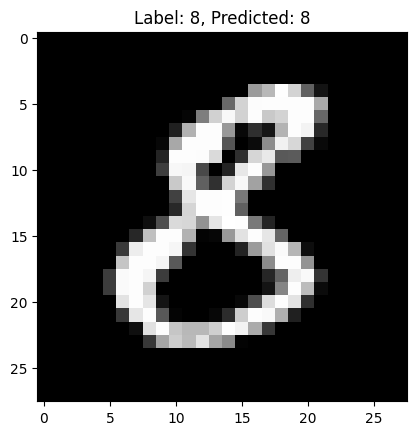

In [86]:
plt.imshow(X_test[mysample].reshape(28, 28), cmap='gray')  # Affiche l'image de l'échantillon
plt.title(f"Label: {np.argmax(y_test[mysample])}, Predicted: {np.argmax(y_test_pred[mysample])}")  # Affiche le label réel et la prédiction

#### Transformation les probabilités en modalité la plus vraisemblable

In [87]:
y_test_class = np.argmax(y_test, axis=1)  # Convertit les étiquettes de test en classes
y_test_pred_class = np.argmax(y_test_pred, axis=1)  # Convertit les prédictions en classes

In [89]:
res = pd.concat(
    [pd.DataFrame(y_test_class, columns=['Y']),
     pd.DataFrame(y_test_pred_class, columns=['Ypred'])],
    axis=1
)
res

,Y,Ypred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [ ]:
mymodel = model.fit(
    X_train,  # Données d'entraînement
    y_train,  # Étiquettes d'entraînement
    epochs=10,  # Nombre d'époques pour l'entraînement
    batch_size=32,  # Taille du lot pour l'entraînement
    validation_data=(X_test, y_test)  # Données de validation
)
# Évaluation du modèle sur les données de test
test_loss, test_accuracy, test_f1_score = model.evaluate(X_test, y_test)   
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Test F1 Score: {test_f1_score}")

# Prédictions sur les données de test
predictions = model.predict(X_test)
# Affichage des 10 premières prédictions
for i in range(10):
    print(f"Image {i+1}: Prédiction = {np.argmax(predictions[i])}, Réel = {np.argmax(y_test[i])}")
# Tracer la courbe de perte et d'exactitude
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mymodel.history['loss'], label='Perte d\'entraînement')
plt.plot(mymodel.history['val_loss'], label='Perte de validation')
plt.title('Courbe de perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(mymodel.history['accuracy'], label='Exactitude d\'entraînement')


TypeError: Kernel.raw_input() got an unexpected keyword argument 'shape'

In [ ]:
# modèle CNN
model.add(Flatten(input_shape=(28, 28, 1)))  # Aplatir l'entrée
model.add(Dense(128, activation='relu'))  # Couche dense avec 128 neurones et activation ReLU
model.add(Dropout(0.2))  # Dropout pour éviter le surapprentissage
model.add(Dense(64, activation='relu'))  # Couche dense avec 64 neurones et activation ReLU
model.add(Dropout(0.2))  # Dropout pour éviter le surapprentissage
model.add(Dense(10, activation='softmax'))  # Couche de sortie avec 10 neurones (pour les 10 classes) et activation softmax
# Compilation du modèle


In [ ]:
# Taille des données
print("Taille des données d'entraînement :", X_train.shape, y_train.shape)
print("Taille des données de test :", X_test.shape, y_test.shape)

# Normalisation des données
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape des données pour les adapter à l'entrée du modèle CNN
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# Conversion des étiquettes en format catégoriel
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Création du modèle CNN
model = Sequential()


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', F1Score(num_classes=10, average='macro')])
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Évaluation du modèle
test_loss, test_accuracy, test_f1 = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1)

# Visualisation de l'historique d'entraînement

Taille des données d'entraînement : (60000, 28, 28) (60000,)
Taille des données de test : (10000, 28, 28) (10000,)


d:\Master\MBA ESG\Résolution de problèmes démarche et outils\Deep Learning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TypeError: F1Score.__init__() got an unexpected keyword argument 'num_classes'